In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
#df = pd.read_csv('C:\\Users\\stoer\\OneDrive\\Desktop\\Machine Learning\\Week 4 - Regression\\CreditDataset.csv', header=None)
#df.to_csv('CreditData.csv')

In [3]:
df = pd.read_csv('CreditData.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,a_or_b,Col_2,Col_3,p_g_or_gg,ff_d_i_k_j_aa_m_c_w_e_q_r_cc_or_x,ff_dd_j_bb_v_n_o_h_or_z,Col_7,t_or_f,Col_11,qt_or_rs,s_g_or_p,Col_12,Col_13,Target
1,1,1,22.08,11.46,2,4,4,1.585,0,0,1,2,100,1213,0
2,2,0,22.67,7,2,8,4,0.165,0,0,0,2,160,1,0
3,3,0,29.58,1.75,1,4,4,1.25,0,0,1,2,280,1,0
4,4,0,21.67,11.5,1,5,3,0,1,11,1,2,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  691 non-null    int64 
 1   0           691 non-null    object
 2   1           691 non-null    object
 3   2           691 non-null    object
 4   3           691 non-null    object
 5   4           691 non-null    object
 6   5           691 non-null    object
 7   6           691 non-null    object
 8   7           691 non-null    object
 9   8           691 non-null    object
 10  9           691 non-null    object
 11  10          691 non-null    object
 12  11          691 non-null    object
 13  12          691 non-null    object
 14  13          691 non-null    object
dtypes: int64(1), object(14)
memory usage: 81.1+ KB


In [5]:
df = df.drop(index=0).reset_index(drop=True)
df = df.rename(columns={'Unnamed: 0': 'Lables'})
df

,Lables,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1,22.08,11.46,2,4,4,1.585,0,0,1,2,100,1213,0
1,2,0,22.67,7,2,8,4,0.165,0,0,0,2,160,1,0
2,3,0,29.58,1.75,1,4,4,1.25,0,0,1,2,280,1,0
3,4,0,21.67,11.5,1,5,3,0,1,11,1,2,0,1,1
4,5,1,20.17,8.17,2,6,4,1.96,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,686,1,31.57,10.5,2,14,4,6.5,1,0,0,2,0,1,1
686,687,1,20.67,0.415,2,8,4,0.125,0,0,0,2,0,45,0
687,688,0,18.83,9.54,2,6,4,0.085,1,0,0,2,100,1,1
688,689,0,27.42,14.5,2,14,8,3.085,1,1,0,2,120,12,1


In [6]:
# check for different values for each variable

for column in df:
    unique_values = df[column].unique()
    no_values = len(unique_values)
    if no_values < 10:
        print('The number of values for feature {} : {} -- {}'.format(column, no_values, unique_values))
    else:
        print('The number of values for feature {} :  {}'.format(column, no_values))

The number of values for feature Lables :  690
The number of values for feature 0 : 2 -- ['1' '0']
The number of values for feature 1 :  350
The number of values for feature 2 :  215
The number of values for feature 3 : 3 -- ['2' '1' '3']
The number of values for feature 4 :  14
The number of values for feature 5 : 8 -- ['4' '3' '8' '1' '5' '9' '2' '7']
The number of values for feature 6 :  132
The number of values for feature 7 : 2 -- ['0' '1']
The number of values for feature 8 :  23
The number of values for feature 9 : 2 -- ['1' '0']
The number of values for feature 10 : 3 -- ['2' '1' '3']
The number of values for feature 11 :  171
The number of values for feature 12 :  240
The number of values for feature 13 : 2 -- ['0' '1']


In [7]:
# Covert data tzpe

df['0'] = df['0'].astype(int)
df['1'] = df['1'].astype(float)
df['2'] = df['2'].astype(float)
df['3'] = df['3'].astype(int)
df['4'] = df['4'].astype(int)
df['5'] = df['5'].astype(int)
df['6'] = df['6'].astype(float)
df['7'] = df['7'].astype(float)
df['8'] = df['8'].astype(int)
df['9'] = df['9'].astype(int)
df['10'] = df['10'].astype(int)
df['11'] = df['11'].astype(int)
df['12'] = df['12'].astype(int)
df['13'] = df['13'].astype(int)


In [8]:
df.dtypes

Lables      int64
0           int32
1         float64
2         float64
3           int32
4           int32
5           int32
6         float64
7         float64
8           int32
9           int32
10          int32
11          int32
12          int32
13          int32
dtype: object

In [9]:
df.columns = [str(col) for col in df.columns]
print(df.columns.dtype)

object


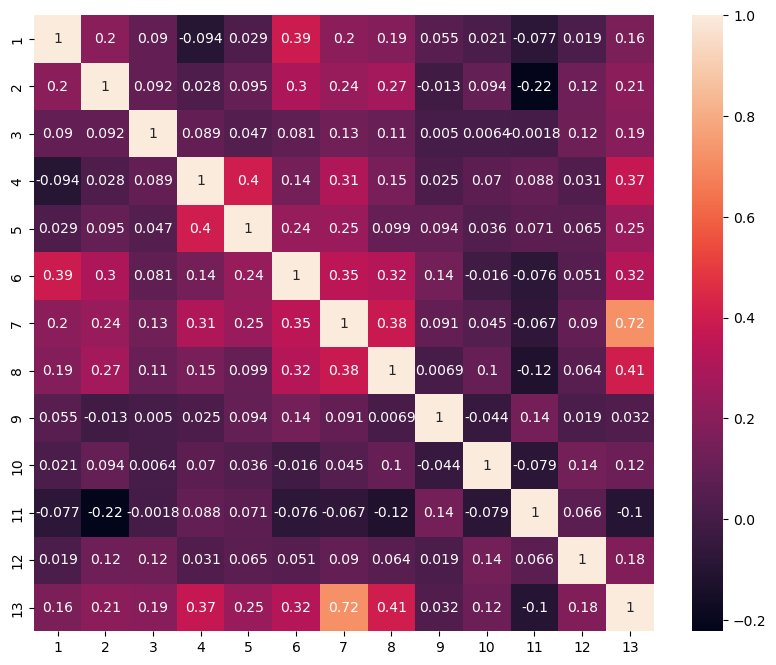

In [10]:
hm = df[['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','13']].corr()
plt.figure(figsize=(10, 8))
g = sns.heatmap(hm, annot=True)

<Axes: xlabel='13', ylabel='count'>

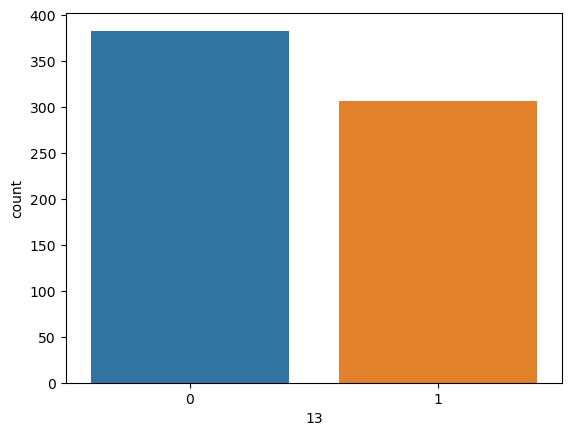

In [11]:
sns.countplot(data = df, x = '13')

Text(0.5, 1.0, 'Violin plot of 13 vs 6')

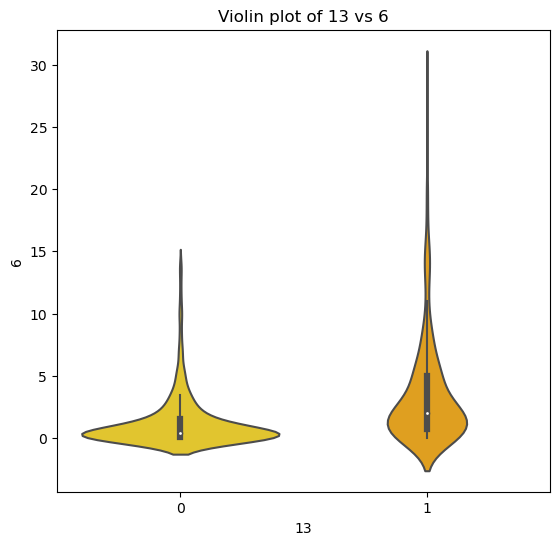

In [12]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='13', y='6',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of 13 vs 6')

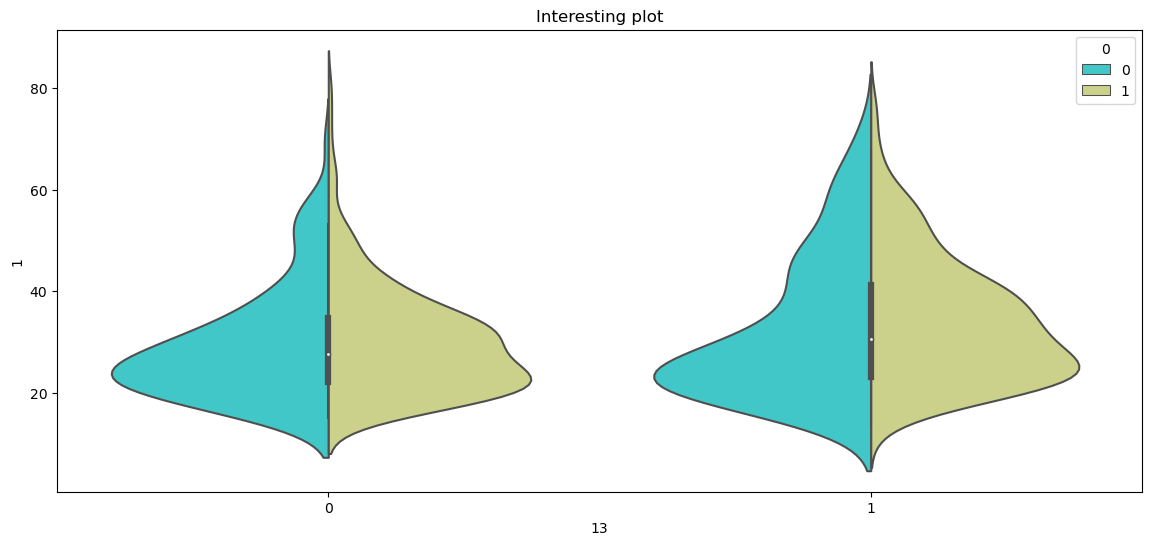

In [13]:
plt.figure(figsize=(14,6))
sns.violinplot(x='13', y='1',hue='0',data=df,palette='rainbow',split=True)
plt.title('Interesting plot');

Text(0.5, 1.0, 'funny plot')

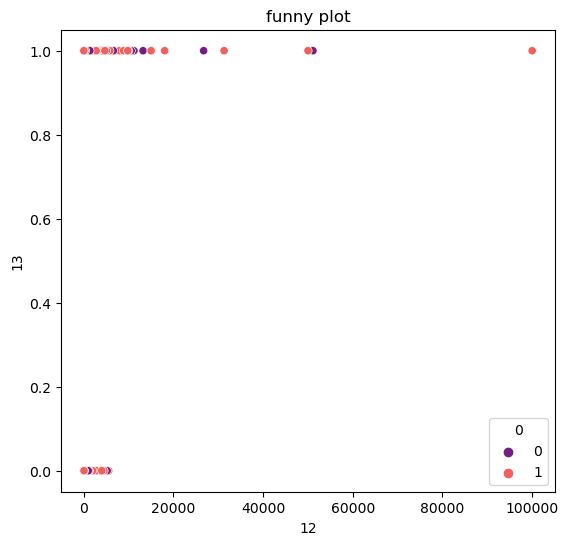

In [14]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='12',y='13',data=df,palette='magma',hue='0',ax=ax)
# can be also = 'virdis'
ax.set_title('funny plot')

In [15]:
X = df.drop('13', axis =1)
y = df['13']

X

,Lables,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,1,22.08,11.460,2,4,4,1.585,0.0,0,1,2,100,1213
1,2,0,22.67,7.000,2,8,4,0.165,0.0,0,0,2,160,1
2,3,0,29.58,1.750,1,4,4,1.250,0.0,0,1,2,280,1
3,4,0,21.67,11.500,1,5,3,0.000,1.0,11,1,2,0,1
4,5,1,20.17,8.170,2,6,4,1.960,1.0,14,0,2,60,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,686,1,31.57,10.500,2,14,4,6.500,1.0,0,0,2,0,1
686,687,1,20.67,0.415,2,8,4,0.125,0.0,0,0,2,0,45
687,688,0,18.83,9.540,2,6,4,0.085,1.0,0,0,2,100,1
688,689,0,27.42,14.500,2,14,8,3.085,1.0,1,0,2,120,12


In [16]:
dt = DecisionTreeClassifier(random_state=15, criterion='entropy', max_depth=10)
dt.fit(X, y)

for i, column in enumerate(df.drop('13', axis =1)):
    dt.feature_importances_[i]
    fdt = pd.DataFrame({'Feature': X.columns, 'Importance': dt.feature_importances_})
    fdt = fdt.sort_values(by='Importance', ascending=False)

print(fdt)

   Feature  Importance
8        7    0.443054
0   Lables    0.110502
13      12    0.086322
3        2    0.078151
5        4    0.057207
12      11    0.043340
2        1    0.040480
9        8    0.039810
7        6    0.036185
4        3    0.035594
6        5    0.015359
10       9    0.007974
1        0    0.006020
11      10    0.000000


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=15)

In [18]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [20]:
lm.score(X_train, y_train)

0.5692176769323236

In [21]:
lm.score(X_test, y_test)

0.6302191656272366

C:\Users\stoer\AppData\Local\Temp\ipykernel_17092\170141317.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_pred_test.min(), y_pred_test.max()], 'k--', c = 'red', lw=3)


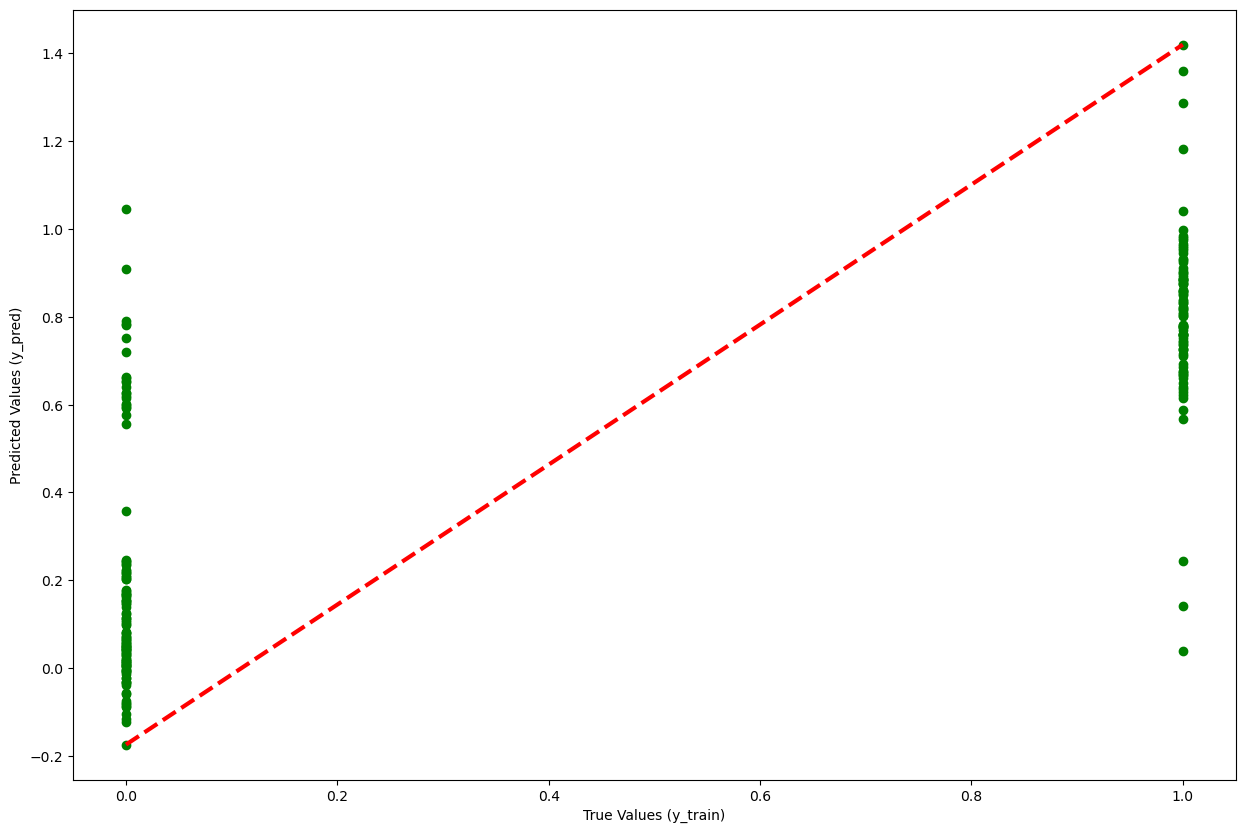

In [22]:
plt.figure(figsize=(15, 10))

plt.scatter(y_test, y_pred_test, color = 'green')
plt.plot([y_test.min(), y_test.max()], [y_pred_test.min(), y_pred_test.max()], 'k--', c = 'red', lw=3)
plt.xlabel('True Values (y_train)')
plt.ylabel('Predicted Values (y_pred)')

plt.show()

In [23]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Data preprocessing step: Standardization
    ('classifier', LogisticRegression())  # Logistic Regression model
])

In [24]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [25]:
y_pred = pipeline.predict(X_test)

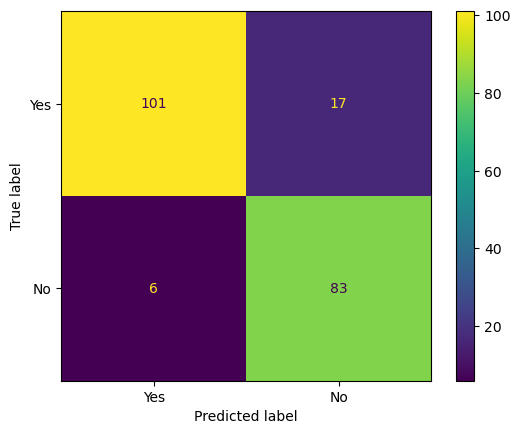

In [26]:
plot_confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(plot_confusion_matrix, display_labels=["Yes", "No"])
disp.plot()

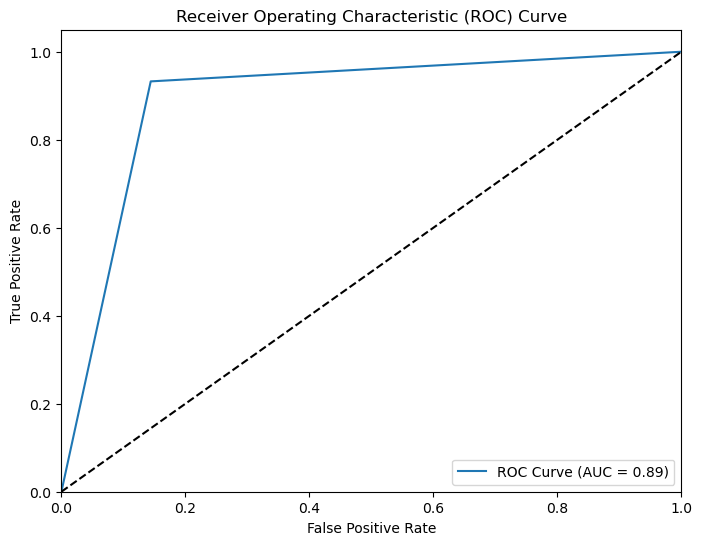

In [27]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

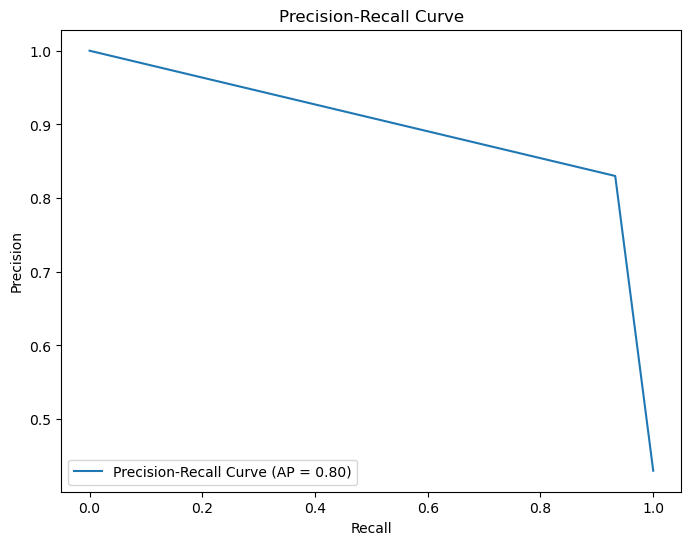

In [28]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve (AP = {:.2f})'.format(average_precision_score(y_test, y_pred)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

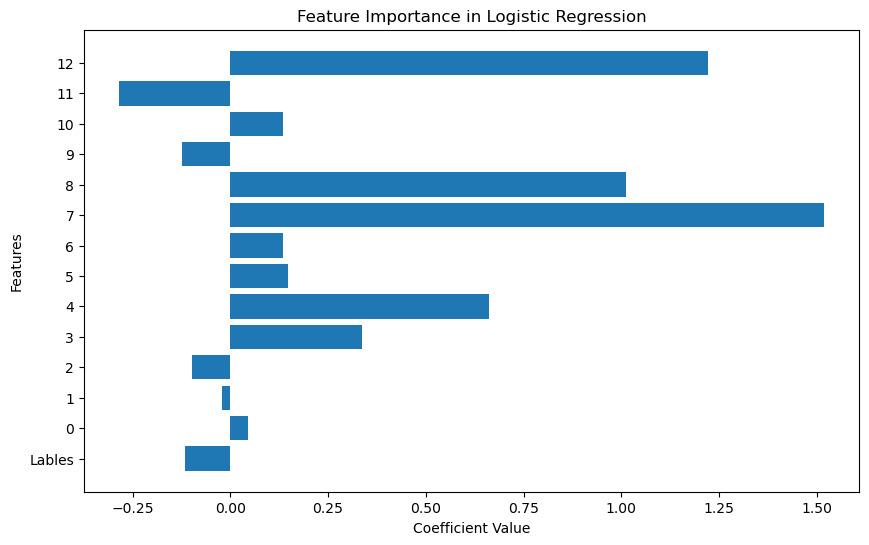

In [29]:
# Fit the pipeline on your training data
pipeline.fit(X_train, y_train)

# Access the logistic regression model from the pipeline
logistic_regression_model = pipeline.named_steps['classifier']

# Get feature coefficients
feature_importance = logistic_regression_model.coef_[0]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(df.columns[:-1], feature_importance)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression')
plt.show()

C:\Users\stoer\AppData\Local\Temp\ipykernel_17092\4245102491.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', c ='r')


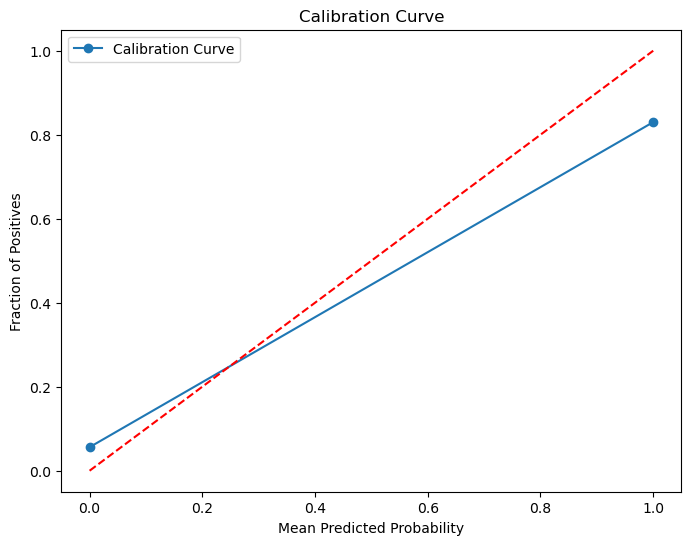

In [30]:
from sklearn.calibration import calibration_curve

# Calculate calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration Curve')
plt.plot([0, 1], [0, 1], 'k--', c ='r')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()

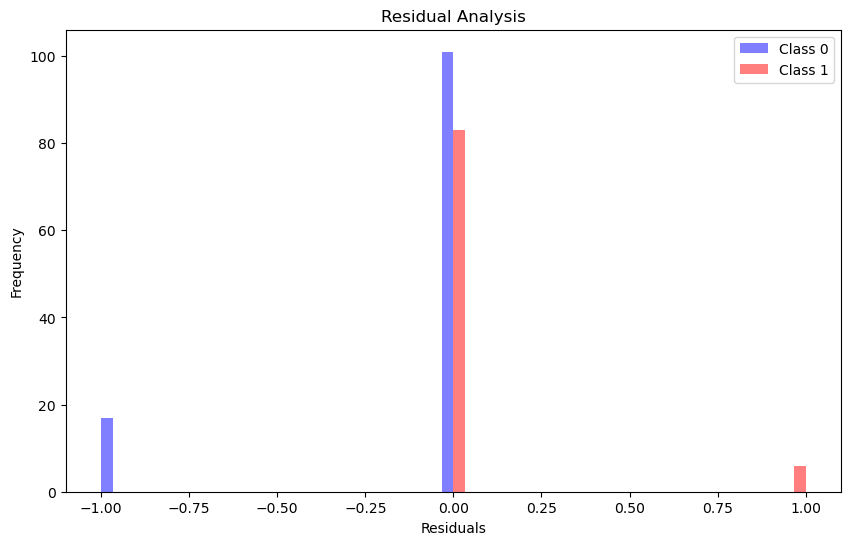

In [31]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residual histograms for each class
plt.figure(figsize=(10, 6))
plt.hist(residuals[y_test == 0], bins=30, alpha=0.5, label='Class 0', color='blue')
plt.hist(residuals[y_test == 1], bins=30, alpha=0.5, label='Class 1', color='red')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Analysis')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import f1_score

# Assuming you have true labels (y_true) and predicted labels (y_pred)
f1 = f1_score(y_test, y_pred, average='binary')  # For binary classification
f1

0.8783068783068783

from sklearn.metrics import f1_score

# Assuming you have true labels (y_true) and predicted labels (y_pred) for multiclass
f1_macro = f1_score(y_true, y_pred, average='macro')
You can choose the appropriate average option based on your specific classification problem and evaluation goals.